<a href="https://colab.research.google.com/github/22053604/Cardiovascular-Health-Analysis/blob/main/Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Version Control**

# Pseudocode

....

In [184]:
#import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [185]:
#Established a connection to the SQLite database
db_path = '/content/cardio_health.db'
conn = sqlite3.connect('cardiohealth.db')
cursor = conn.cursor()

#Function for error if problem connecting to SQLite database
try:
    conn = sqlite3.connect('cardiohealth.db')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")

#Retrieve and display table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('medical_examination',)]


In [191]:
#Export all tables to CSV files &  Panadas dataframe
for table_name in tables:
    df = pd.read_sql(f"SELECT * FROM {table_name[0]}", conn)
    csv_file_name = f"{table_name[0]}.csv"
    df.to_csv(csv_file_name, index=False)
    print(f"Exported {table_name[0]} to {csv_file_name}")

#Load data from medical_examnination table
query = "SELECT * FROM medical_examination"
df = pd.read_sql(query, conn)

#Display tables
df = pd.read_csv('/content/medical_examination.csv')
print(df.head())

Exported medical_examination to medical_examination.csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
#Show the missing values
print("Missing values in dataset: ")
print(df.isnull().sum())

# Remove duplicates and handle missing values
df_cleaned = df.drop_duplicates()

#Print table again after removing duplicates
print("After removing duplicates:")
print(df_cleaned.head())

#Converting age from days to years
df_cleaned['age_years'] = df['age'] / 365



Missing values in dataset: 
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64
After removing duplicates:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years  
0     0       1       0  50.391781  
1     0       1       1  55.419178  
2     0       0       1  51.663014  
3     0       1       1  48.282192  
4     0       0       0  47.

In [ ]:
#Grouping into category groups

#Define Age into bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
#Create age columns
df_cleaned['age_group'] = pd.cut(df_cleaned['age_years'], bins=age_bins, labels=age_labels, right=False)


#Transform Categorial Data columns into understandable format

#Transform Cholesterol levels into readable categories
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

#Transform Glucose levels into readable categories
df_cleaned['glucose'] = df_cleaned['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

#Transform Gender codes into understandable format (1 = female, 2 = male)
df_cleaned['gender'] = df_cleaned['gender'].map({1: 'Female', 2: 'Male'})

#Transform Smoker codes into understandable format (0 = non-smoker, 1 = smoker)
df_cleaned['smoking_status'] = df_cleaned['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})

#Transform Drinker codes into understandable format (0 = non-drinker, 1 = drinker)
df_cleaned['alcohol_consumption'] = df_cleaned['alco'].map({0: 'Non-drinker', 1: 'Drinker'})

#Transform Active codes into understandable format (0 = inactive, 1 = active)
df_cleaned['physical_activity'] = df_cleaned['active'].map({0: 'Inactive', 1: 'Active'})

#Transform Cardio Disease codes into understandable format (0 = no disease, 1 = disease)
df_cleaned['cardio_disease_presence'] = df_cleaned['cardio'].map({0: 'No Disease', 1: 'Disease'})


#Display the cleaned data
print(df_cleaned.head())





   id    age  gender  height  weight  ap_hi  ap_lo        cholesterol  gluc  \
0   0  18393    Male     168    62.0    110     80             Normal     1   
1   1  20228  Female     156    85.0    140     90  Well Above Normal     1   
2   2  18857  Female     165    64.0    130     70  Well Above Normal     1   
3   3  17623    Male     169    82.0    150    100             Normal     1   
4   4  17474  Female     156    56.0    100     60             Normal     1   

   smoke  alco  active  cardio  age_years age_group glucose smoking_status  \
0      0     0       1       0  50.391781     50-59  Normal     Non-smoker   
1      0     0       1       1  55.419178     50-59  Normal     Non-smoker   
2      0     0       0       1  51.663014     50-59  Normal     Non-smoker   
3      0     0       1       1  48.282192     40-49  Normal     Non-smoker   
4      0     0       0       0  47.873973     40-49  Normal     Non-smoker   

  alcohol_consumption physical_activity cardio_disease_p

In [ ]:
print(df.head())
print(df.dtypes)


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years  
0     0       1       0  50.391781  
1     0       1       1  55.419178  
2     0       0       1  51.663014  
3     0       1       1  48.282192  
4     0       0       0  47.873973  
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int6

# Data Functions & Graph Visualisations

<ipython-input-187-0be42e2eac8a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_counts = df.groupby(['age_group', 'cardio_disease_presence']).size().unstack()


<Figure size 1000x600 with 0 Axes>

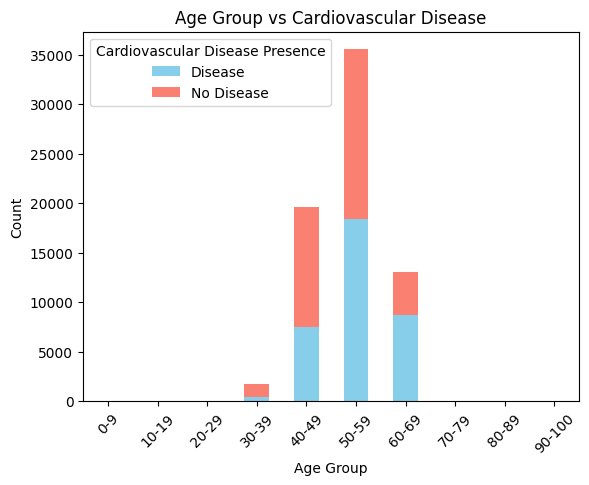

<Figure size 800x500 with 0 Axes>

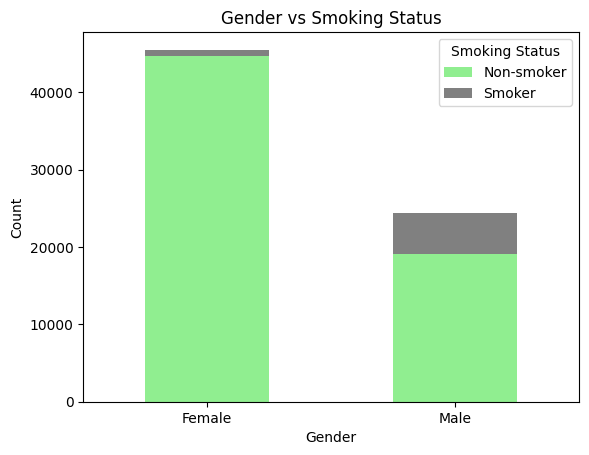

<Figure size 1000x600 with 0 Axes>

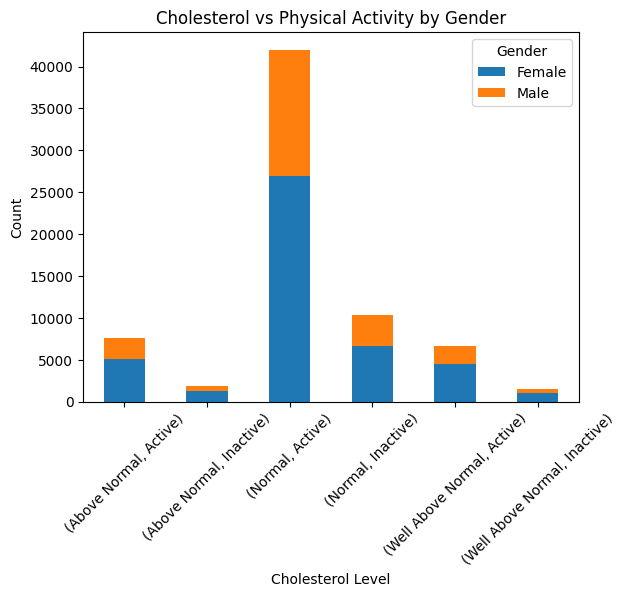

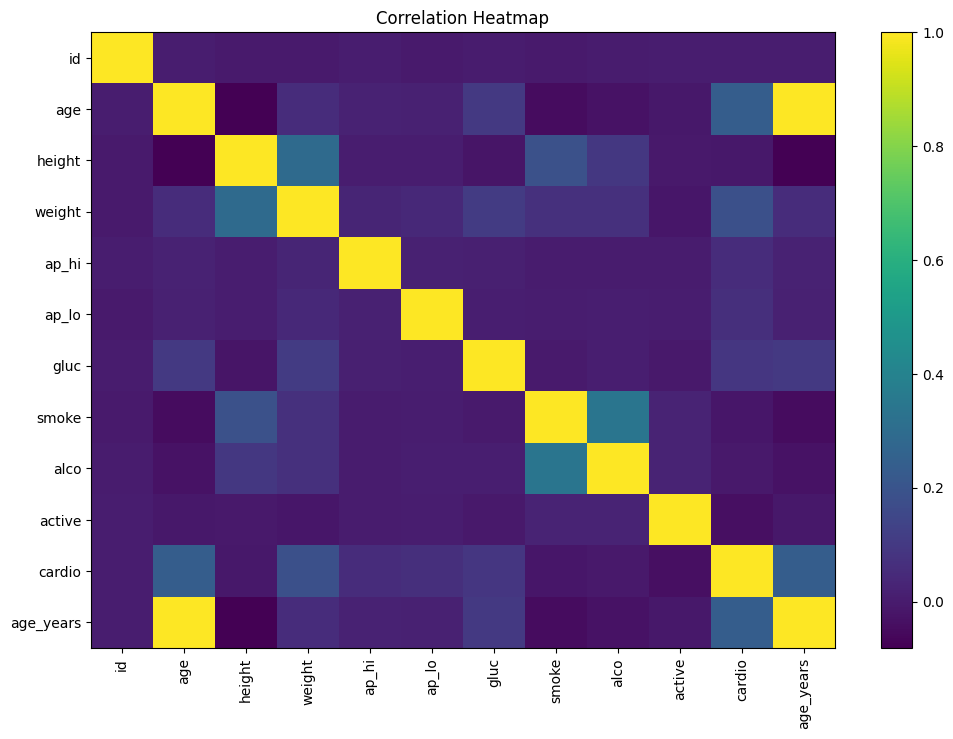

In [187]:
# Function to create visualizations
def create_visualisations(df):

    # Age Group vs Cardiovascular Disease
    plt.figure(figsize=(10, 6))
    # Ensure the input DataFrame has 'age_group' and 'cardio_disease_presence' columns.
    # If not, the try-except block will print a message and skip plotting
    try:
        age_disease_counts = df.groupby(['age_group', 'cardio_disease_presence']).size().unstack()
        age_disease_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
    except KeyError as e:
        print(f"Error: Missing column(s) for visualization: {e}")
        return  # Exit the function early if necessary columns are missing

    #plot graph design
    plt.title('Age Group vs Cardiovascular Disease')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Cardiovascular Disease Presence')
    plt.show()

 # Gender vs Smoking Status
    plt.figure(figsize=(8, 5))
    gender_smoke_counts = df.groupby(['gender', 'smoking_status']).size().unstack()
    gender_smoke_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'gray'])
    plt.title('Gender vs Smoking Status')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Smoking Status')
    plt.show()

# Cholesterol vs Physical Activity by Gender
    plt.figure(figsize=(10, 6))
    cholesterol_activity_counts = df.groupby(['cholesterol', 'physical_activity', 'gender']).size().unstack()
    cholesterol_activity_counts.plot(kind='bar', stacked=True)
    plt.title('Cholesterol vs Physical Activity by Gender')
    plt.xlabel('Cholesterol Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()


# Correlation Heatmap using Matplotlib
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=np.number)  #GEN AI SUGGESTION
    correlation_matrix = numeric_df.corr()
    plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
    plt.title('Correlation Heatmap')
    plt.show()


#Display graphs
create_visualisations(df_cleaned)


# Adding Widgets

*Note: 0 blue & 1 orange = should be smoker/non-smoker
Risk in percentage:*
(Teacher's feedback)


# Shanto's data combinations functions

*   Used Gen AI prompt & response to fix and combine



In [ ]:
#Create combination 1 (demographic: female, and lifestyle: smoker)
demographic_lifestyle_combination = df_cleaned[(df_cleaned['gender'] == 1) & (df_cleaned['smoke'] == 1)]
print(demographic_lifestyle_combination.head())

#Create combination 2 (demographic: female, and lifestyle: smoker)
age_cholesterol_combination = df_cleaned[(df_cleaned['age_years'] > 50) & (df_cleaned['cholesterol'] != 'Normal')]
print(age_cholesterol_combination.head())

age_bp_activity = df_cleaned[(df_cleaned['age_years'] > 40) & (df_cleaned['ap_hi'] > 120) & (df_cleaned['active'] == 1)]
print(age_bp_activity.head())

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, age_group]
Index: []
   id    age  gender  height  weight  ap_hi  ap_lo        cholesterol  gluc  \
1   1  20228  female     156    85.0    140     90  Well Above Normal     1   
2   2  18857  female     165    64.0    130     70  Well Above Normal     1   
5   8  21914  female     151    67.0    120     80       Above Normal     2   
6   9  22113  female     157    93.0    130     80  Well Above Normal     1   
7  12  22584    male     178    95.0    130     90  Well Above Normal     3   

   smoke  alco  active  cardio  age_years age_group  
1      0     0       1       1  55.419178     50-59  
2      0     0       0       1  51.663014     50-59  
5      0     0       0       0  60.038356     60-69  
6      0     0       1       0  60.583562     60-69  
7      0     0       1       1  61.873973     60-69  
    id    age  gender  height  weight  ap_hi  ap